<a href="https://colab.research.google.com/github/PaletteofDesign/knn/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
# For scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [3]:
f = '/content/abalone.data'
df = pd.read_csv(f, delimiter=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.rename(columns={0:'Sex', 1:'Length', 2:'Diameter', 3:'Height', 4:'Whole_Weight', 5:'Shucked_Weight', 6:'Viscera_Weight', 7:'Shell_Weight', 8:'Rings'}, inplace=True)
df.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# 1) Is this a balanced data set

In [5]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

## Predicting Age - Add 1.5 to Rings

In [6]:
X = df.loc[:,['Length', 'Diameter', 'Height', 'Whole_Weight', 'Shucked_Weight', 'Viscera_Weight', 'Shell_Weight']]
X

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [7]:
X.shape

(4177, 7)

In [8]:
y = df.loc[:, 'Rings']

In [9]:
y.shape

(4177,)

## 2) Be sure to use standard scaler to scale your features. Remember to fit on the training set and transform both the training and test sets.

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X = scaler.transform(X)

In [13]:
reg = KNeighborsRegressor()

In [14]:
reg.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [15]:
pred_age = reg.predict(X)

In [16]:
print(pred_age)

[ 9.4  7.   9.6 ... 11.  10.  11.2]


## 3) What is the accuracy of your default model?

In [17]:
reg.score(X, y)

0.6576046052340014

In [19]:
np.sqrt(mean_squared_error(y, pred_age)) # add 1.5 to get age - wrong by 1.9 rings

1.8863825357290773

## Predicting Sex

In [46]:
filter = (df['Sex']== 'M') | (df['Sex']=='F')

In [47]:
df[filter]

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [48]:
X = df[filter].loc[:,['Length', 'Diameter', 'Height', 'Whole_Weight', 'Shucked_Weight', 'Viscera_Weight', 'Shell_Weight', 'Rings']]
X

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [49]:
y = df[filter].loc[:, 'Sex']

## 2) Be sure to use standard scaler to scale your features. Remember to fit on the training set and transform both the training and test sets.

In [50]:
scaler = StandardScaler()

In [51]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
X = scaler.transform(X)

In [53]:
clas = KNeighborsClassifier()

In [54]:
clas.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [55]:
pred_sex_1 = clas.predict(X)

In [56]:
print(pred_sex_1)

['F' 'M' 'F' ... 'M' 'F' 'M']


## 3) What is the accuracy of your default model?

In [57]:
clas.score(X, y)

0.7008818342151676

## 4) What is the optimal accuracy you can achieve by tuning the value of K using KNN?

In [58]:
clas_2 = KNeighborsClassifier(n_neighbors=1)

In [59]:
clas_2.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [60]:
pred_sex_2 = clas.predict(X)

In [61]:
print(pred_sex_2)

['F' 'M' 'F' ... 'M' 'F' 'M']


In [62]:
clas_2.score(X, y)

1.0

## 5) Create a confusion matrix for you optimal KNN model.

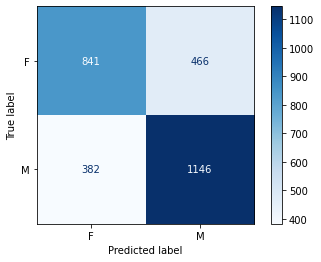

In [71]:
plot_confusion_matrix(clas, X, y, cmap = 'Blues', values_format='.5g');

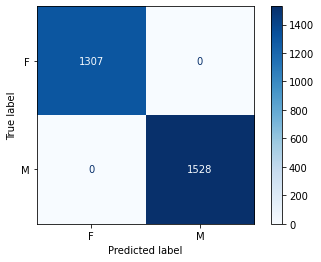

In [70]:
plot_confusion_matrix(clas_2, X, y, cmap = 'Blues', values_format='.5g');